# Visual Analysis of Apps on AppleStore

How do you visualize price distribution of paid apps ?
How does the price distribution get affected by category ?
What about paid apps Vs Free apps ?
Are paid apps good enough ?
As the size of the app increases do they get pricier ?
How are the apps distributed category wise ? can we split by paid category ?

In [112]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [13]:
AppleStore= pd.read_csv("../resource/data/app-store-apple-data-set-10k-apps/AppleStore.csv")


In [14]:
AppleStore.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [15]:
AppleStore[["track_name","user_rating","prime_genre"]].head()

track_name  user_rating  \
0                                    PAC-MAN Premium          4.0   
1                          Evernote - stay organized          4.0   
2    WeatherBug - Local Weather, Radar, Maps, Alerts          3.5   
3  eBay: Best App to Buy, Sell, Save! Online Shop...          4.0   
4                                              Bible          4.5   

    prime_genre  
0         Games  
1  Productivity  
2       Weather  
3      Shopping  
4     Reference

In [16]:
AppleStore.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [24]:
AppleStore[['track_name','rating_count_tot']].sort_values('rating_count_tot',ascending=False).head()

track_name  rating_count_tot
16                   Facebook           2974676
519                 Instagram           2161558
1346           Clash of Clans           2130805
707                Temple Run           1724546
7     Pandora - Music & Radio           1126879

In [25]:
app_based_on_rating_cnt=AppleStore[['track_name','rating_count_tot']].sort_values('rating_count_tot',ascending=False)

In [27]:
app_based_on_rating_cnt.head(20)

track_name  rating_count_tot
16                               Facebook           2974676
519                             Instagram           2161558
1346                       Clash of Clans           2130805
707                            Temple Run           1724546
7                 Pandora - Music & Radio           1126879
755                             Pinterest           1061624
4                                   Bible            985920
1493                     Candy Crush Saga            961794
178                         Spotify Music            878563
275                           Angry Birds            824451
1246                       Subway Surfers            706110
348                   Fruit Ninja Classic            698516
343                             Solitaire            679055
990                            CSR Racing            677247
3042  Crossy Road - Endless Arcade Hopper            669079
1634             Injustice: Gods Among Us            612532
1218                              Hay Day            567344
1182                   Clear Vision (17+)            541693
1052            Minecraft: Pocket Edition            522012
47                                PAC-MAN            508808

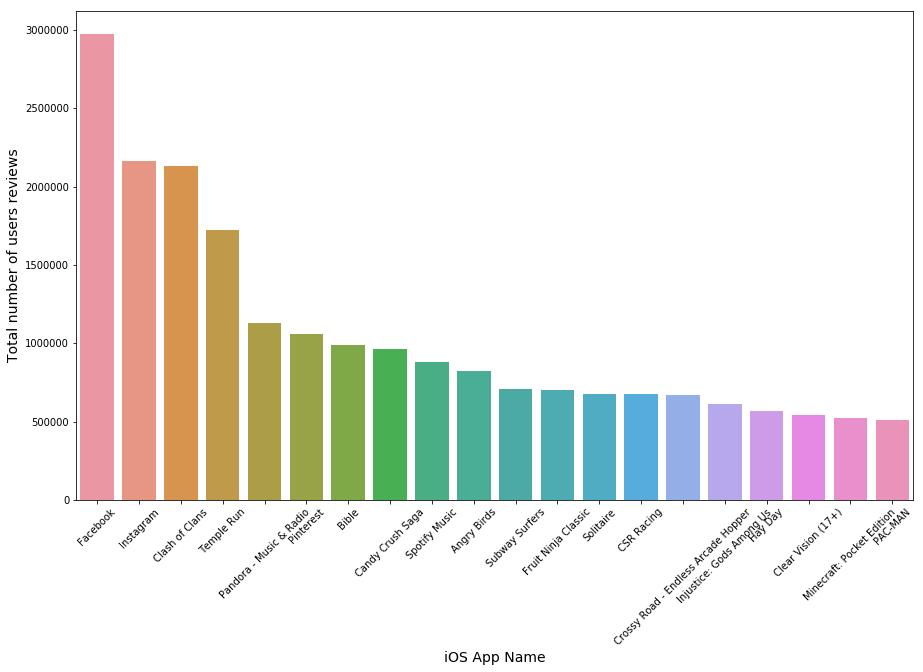

In [54]:
x=app_based_on_rating_cnt['track_name'].head(20)
y=app_based_on_rating_cnt['rating_count_tot'].head(20)
plt.figure(figsize=(15,9))
g=sns.barplot(x=x,y=y,data=app_based_on_rating_cnt)
plt.setp(g.get_xticklabels(), rotation=45)
g.set_ylabel('Total number of users reviews',size=14)
g.set_xlabel('iOS App Name',size=14)
plt.show()

In [62]:
AppleStore['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [63]:
prime_genre_count=AppleStore['prime_genre'].value_counts()

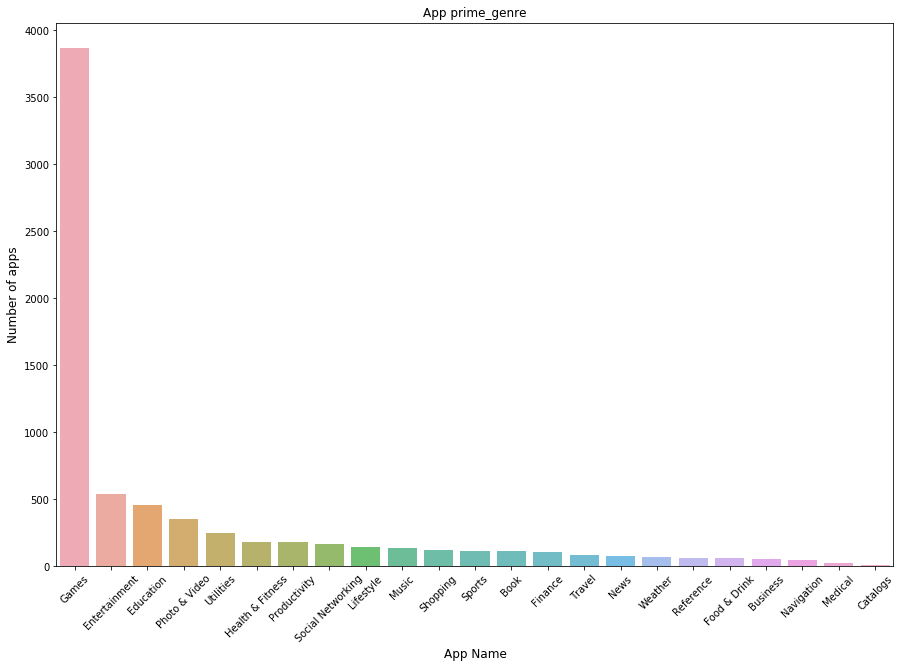

In [72]:
plt.figure(figsize=(15,10))
g=sns.barplot(x=prime_genre_count.index,y=prime_genre_count.values,alpha=0.8)
plt.title('App prime_genre')
plt.ylabel('Number of apps', fontsize=12)
plt.xlabel('App Name', fontsize=12)
plt.setp(g.get_xticklabels(), rotation=45)

plt.show()


In [66]:
prime_genre_count.values

array([3862,  535,  453,  349,  248,  180,  178,  167,  144,  138,  122,
        114,  112,  104,   81,   75,   72,   64,   63,   57,   46,   23,
         10])

In [77]:

AppleStore[['track_name','user_rating','rating_count_tot']].sort_values(['user_rating','rating_count_tot'],ascending=False)

track_name  user_rating  \
1104                                        Head Soccer          5.0   
302                                  Plants vs. Zombies          5.0   
3086         Sniper 3D Assassin: Shoot to Kill Gun Game          5.0   
2177                                 Geometry Dash Lite          5.0   
498                                      Infinity Blade          5.0   
1877                                      Geometry Dash          5.0   
810                                  Domino's Pizza USA          5.0   
2731                                       CSR Racing 2          5.0   
1802  Pictoword: Fun 2 Pics Guess What's the Word Tr...          5.0   
350                               Plants vs. Zombies HD          5.0   
1484                                           The Room          5.0   
1817                                         Iron Force          5.0   
1918                 Sniper Shooter: Gun Shooting Games          5.0   
467                                        Flashlight Ⓞ          5.0   
884   Pic Collage - Picture Editor & Photo Collage M...          5.0   
545    Zappos: shop shoes & clothes, fast free shipping          5.0   
1286  Credit Karma: Free Credit Scores, Reports & Al...          5.0   
5690                        PewDiePie's Tuber Simulator          5.0   
1411  We Heart It - Fashion, wallpapers, quotes, tat...          5.0   
3414  Google Photos - unlimited photo and video storage          5.0   
4207       Color Therapy Adult Coloring Book for Adults          5.0   
3423                   Blackbox - think outside the box          5.0   
3784                                          Egg, Inc.          5.0   
3389    Flight Pilot Simulator 3D: Flying Game For Free          5.0   
2410  Logos Quiz -Guess the most famous brands, new ...          5.0   
2655                 Elevate - Brain Training and Games          5.0   
970                                            HB2 PLUS          5.0   
6688                      Tricky Test 2™: Genius Brain?          5.0   
1191                                         Ski Safari          5.0   
2064                                       The Room Two          5.0   
...                                                 ...          ...   
7089                                               弑仙问情          0.0   
7094                                  泰坦来袭-热血英雄燃爆部落争霸之战          0.0   
7095               死亡フラグがたちました！！【ノベルゲーム型あるある謎解きアドベンチャー】          0.0   
7096                        Ocean Overlord - Global War          0.0   
7104                                   脱出ゲーム　ピラミッドからの脱出          0.0   
7107                                         脱出ゲーム Oden          0.0   
7118                              紫马财行理财精英版—安全可靠的投资理财平台          0.0   
7120                                             js体育资讯          0.0   
7124                                        最佳足球经理(非彩票)          0.0   
7126                           东方头条（探索版）订阅分享感兴趣的新闻和搞笑视频          0.0   
7132             ハマる脳とれ ぱずる!!PITTARI～子供も楽しめる脳とれ ぱずるげーむ～          0.0   
7133                   [GP]パチスロ デビル メイ クライ クロス(パチスロゲーム)          0.0   
7135                                     王权之战-帝国时代皇室争霸！          0.0   
7143                          オービスガイド - 新型オービス&ネズミ捕り&検問          0.0   
7145                                  脱出ゲーム KA-MA-KU-RA          0.0   
7149                                       不良西游-神魔悟空大战篇          0.0   
7151                                          食べないと死ぬ 3          0.0   
7152                                    椅子ドンVR~一ノ宮英介 編~          0.0   
7153                         クリスマスミッケ/脱出ゲーム感覚の絵探しパズルゲーム          0.0   
7157                                               机で卓球          0.0   
7164                                     ＣＲスーパー海物語ＩＮ沖縄４          0.0   
7165                                           開園ピクセル牧場          0.0   
7173                                 My Diary - 你的名字非官方          0.0   
7176                                 Human Juggling Cup          0.0   
7178         

In [79]:
#fact generator 
print ('1. Free apps are ' + str(sum(AppleStore.price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(AppleStore.price > 50)))
print (' -  which is around ' + str(sum(AppleStore.price > 50)/len(AppleStore.price)*100) +" % of the total Apps")
print (' Thus we will dropping the following apps')
outlier=AppleStore[AppleStore.price>50][['track_name','price','prime_genre','user_rating']]
freeapps = AppleStore[AppleStore.price==0]
outlier

1. Free apps are 4056
2. Counting (outliers) super expensive apps 7
 -  which is around 0.09726274836737529 % of the total Apps
 Thus we will dropping the following apps


track_name   price   prime_genre  \
115                     Proloquo2Go - Symbol-based AAC  249.99     Education   
162                                     NAVIGON Europe   74.99    Navigation   
1136                          Articulation Station Pro   59.99     Education   
1479                               LAMP Words For Life  299.99     Education   
2181                      Articulation Test Center Pro   59.99     Education   
2568                                       KNFB Reader   99.99  Productivity   
3238  FineScanner Pro - PDF Document Scanner App + OCR   59.99      Business   

      user_rating  
115           4.0  
162           3.5  
1136          4.5  
1479          4.0  
2181          4.5  
2568          4.5  
3238          4.0

In [81]:
# removing
paidapps =AppleStore[((AppleStore.price<50) & (AppleStore.price>0))]
print('Now the max price of any app in new data is : ' + str(max(paidapps.price)))
print('Now the min price of any app in new data is : ' + str(min(paidapps.price)))
#paidapps.prime_genre.value_counts()

Now the max price of any app in new data is : 49.99
Now the min price of any app in new data is : 0.99


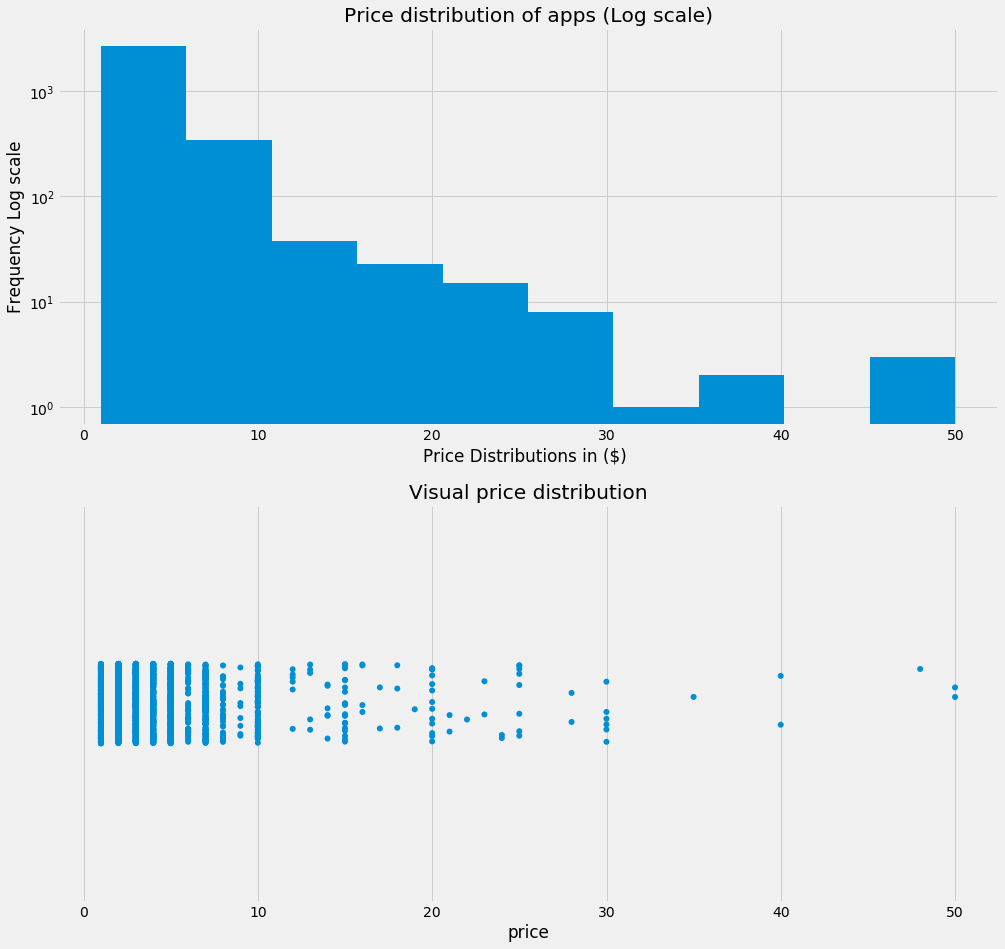

In [82]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(paidapps.price,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paidapps,y='price',jitter= True,orient = 'h' ,size=6)
plt.show()


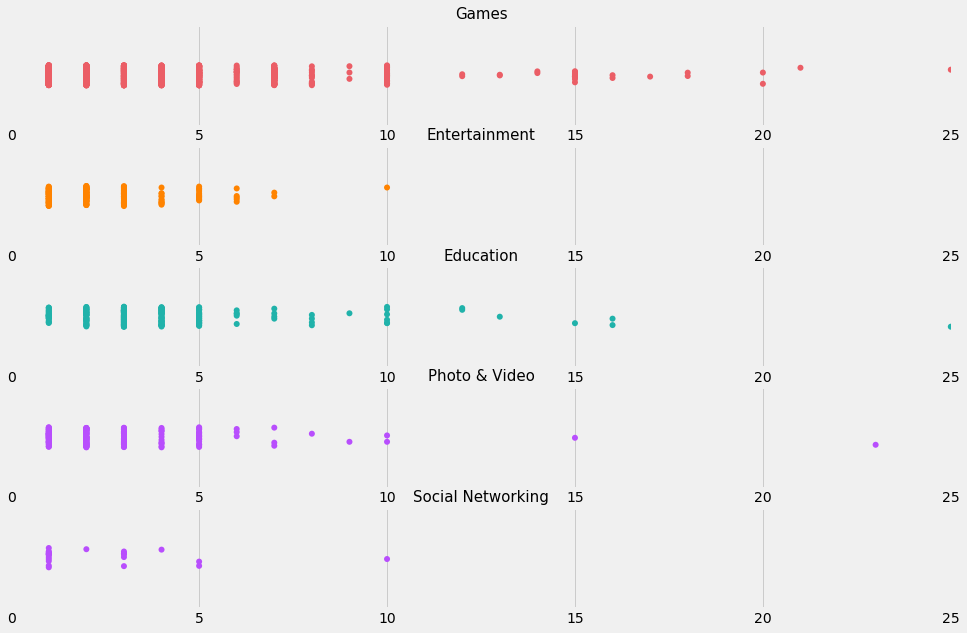

In [86]:
yrange = [0,25]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(5,1,1)
plt.xlim(yrange)
games = paidapps[paidapps.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(5,1,2)
plt.xlim(yrange)
ent = paidapps[paidapps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter= True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(5,1,3)
plt.xlim(yrange)
edu = paidapps[paidapps.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True ,orient ='h' ,size=6,color='#20B2AA')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 

plt.subplot(5,1,4)
plt.xlim(yrange)
pv = paidapps[paidapps.prime_genre=='Photo & Video']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.subplot(5,1,5)
plt.xlim(yrange)
pv = paidapps[paidapps.prime_genre=='Social Networking']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Social Networking',fontsize=fsize)
plt.xlabel('') 


plt.show()


In [88]:
#reducing the number of categories

s = AppleStore.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

AppleStore['broad_genre']= AppleStore.prime_genre.apply(lambda x : categ(x))

In [89]:
AppleStore.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic broad_genre  
0               38                5        10        1       Games  
1               37                5        23        1      Others  
2               37                5         3        1      Others  
3               37                5         9        1      Others  
4               37                5        45        1      Others

In [90]:
s

Index(['Games', 'Entertainment', 'Education', 'Photo & Video'], dtype='object')

In [91]:
free = AppleStore[AppleStore.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = AppleStore[AppleStore.price>0].broad_genre.value_counts().sort_index().to_frame()
total = AppleStore.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist


free  paid  total   paid_per   free_per
Education       132   321    453  70.860927  29.139073
Entertainment   334   201    535  37.570093  62.429907
Games          2257  1605   3862  41.558778  58.441222
Others         1166   832   1998  41.641642  58.358358
Photo & Video   167   182    349  52.148997  47.851003

In [92]:
free

free
Education       132
Entertainment   334
Games          2257
Others         1166
Photo & Video   167

In [93]:
list_free= dist.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist.paid_per.tolist())


In [94]:
list_free

[29.13907284768212,
 62.429906542056074,
 58.44122216468151,
 58.35835835835836,
 47.85100286532951]

In [95]:
tuple_free

(29.13907284768212,
 62.429906542056074,
 58.44122216468151,
 58.35835835835836,
 47.85100286532951)

In [96]:
tuple_paidapps

(70.86092715231788,
 37.570093457943926,
 41.55877783531849,
 41.64164164164164,
 52.14899713467049)

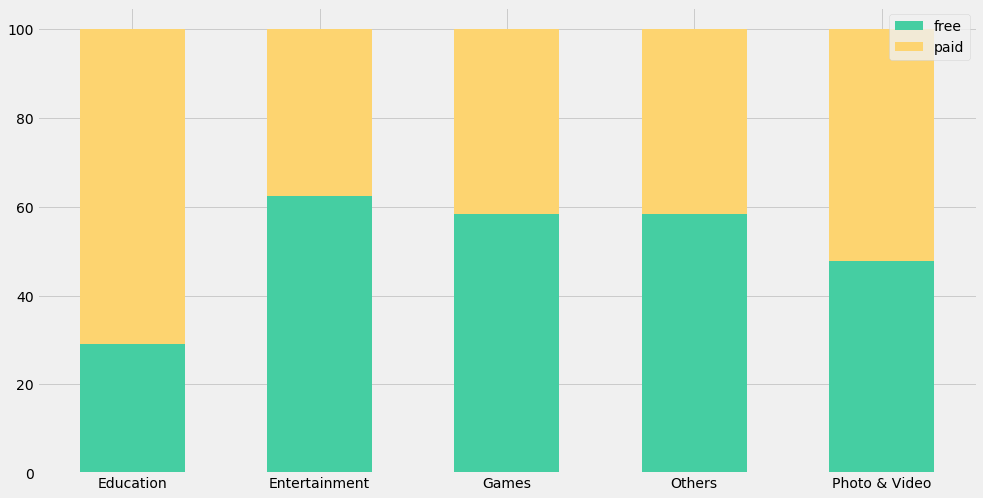

In [99]:
plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple_free, width, color='#45cea2')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='#fdd470')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()
# for pie chart
pies = dist[['free_per','paid_per']]
pies.columns=['free %','paid %']
plt.show()


<Figure size 1080x576 with 0 Axes>

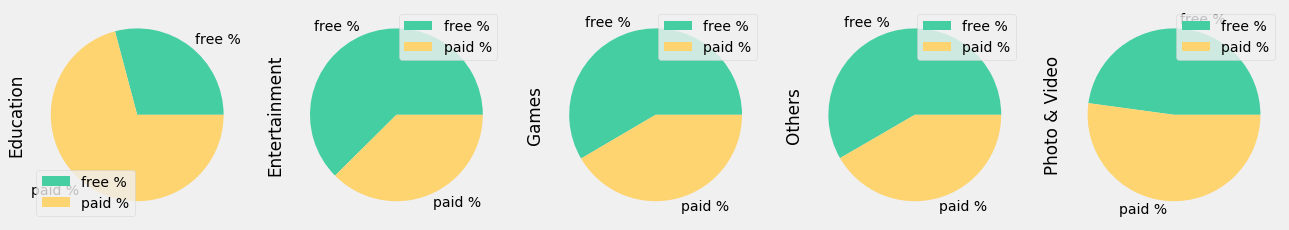

In [100]:
plt.figure(figsize=(15,8))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#45cea2','#fdd470'])
plt.show()

Insights
Education has significant % of Paid apps.
On the contrary - Entertainment category hosts high % of free apps

4. Are paid apps good enough ?


In [101]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

AppleStore['category']= AppleStore.price.apply(lambda x : paid(x))
AppleStore.tail()

Unnamed: 0          id                                 track_name  \
7192       11081  1187617475                                      Kubik   
7193       11082  1187682390                          VR Roller-Coaster   
7194       11087  1187779532      Bret Michaels Emojis + Lyric Keyboard   
7195       11089  1187838770  VR Roller Coaster World - Virtual Reality   
7196       11097  1188375727               Escape the Sweet Shop Series   

      size_bytes currency  price  rating_count_tot  rating_count_ver  \
7192   126644224      USD   0.00               142                75   
7193   120760320      USD   0.00                30                30   
7194   111322112      USD   1.99                15                 0   
7195    97235968      USD   0.00                85                32   
7196    90898432      USD   0.00                 3                 3   

      user_rating  user_rating_ver     ver cont_rating prime_genre  \
7192          4.5              4.5     1.3          4+       Games   
7193          4.5              4.5     0.9          4+       Games   
7194          4.5              0.0   1.0.2          9+   Utilities   
7195          4.5              4.5  1.0.15         12+       Games   
7196          5.0              5.0     1.0          4+       Games   

      sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic broad_genre category  
7192               38                5         1        1       Games     Free  
7193               38                0         1        1       Games     Free  
7194               37                1         1        1      Others     Paid  
7195               38                0         2        1       Games     Free  
7196               40                0         2        1       Games     Free

/Users/prem.vishnoi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


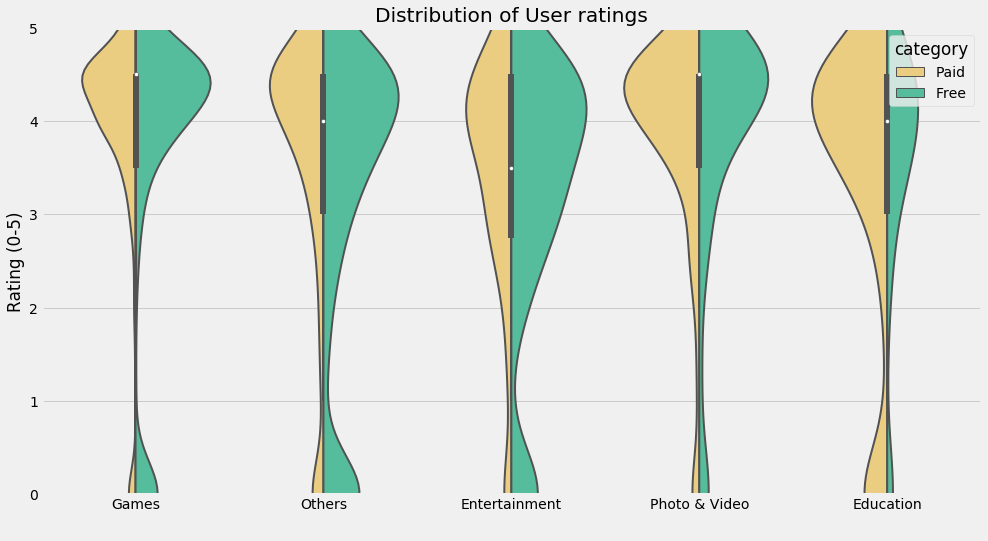

In [103]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=AppleStore, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()


/Users/prem.vishnoi/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


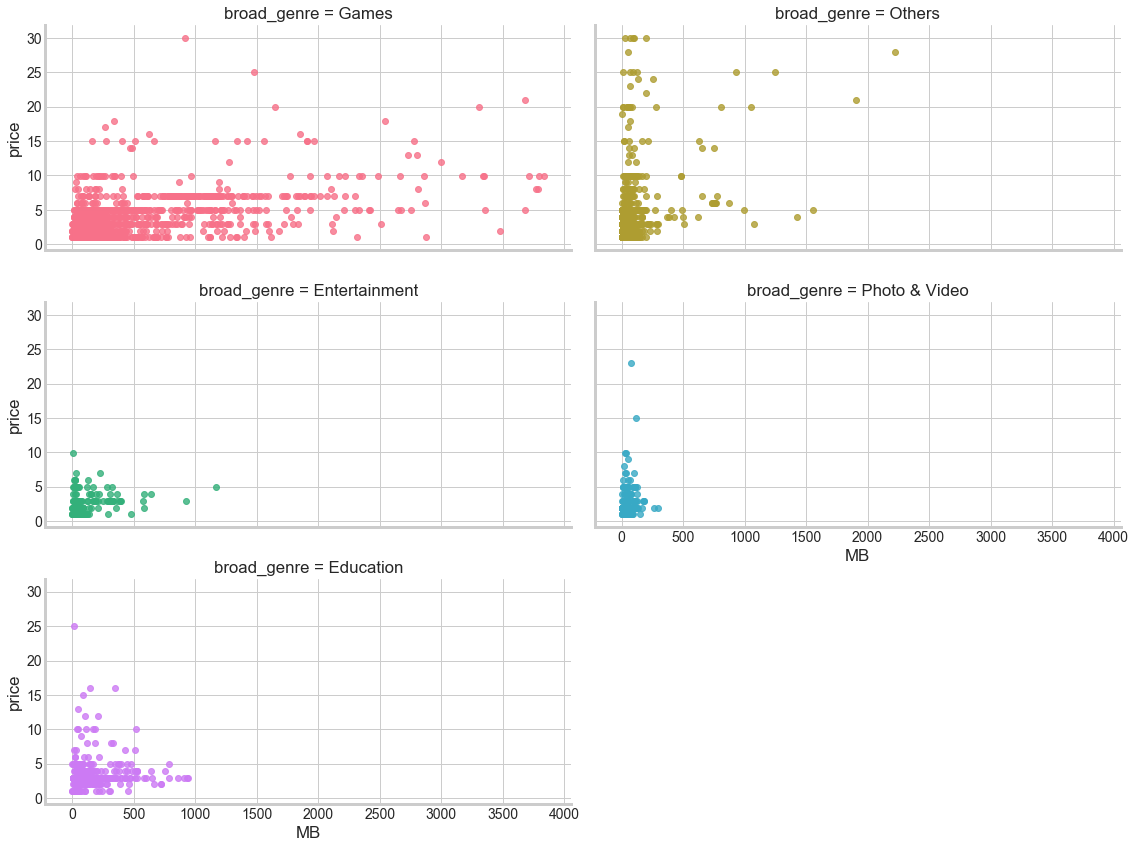

In [105]:
sns.color_palette("husl", 8)
sns.set_style("whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
AppleStore ['MB']= AppleStore.size_bytes.apply(lambda x : x/1048576)
paidapps_regression =AppleStore[((AppleStore.price<30) & (AppleStore.price>0))]
sns.lmplot(data=paidapps_regression,
           x='MB',y='price',size=4, aspect=2,col_wrap=2,hue='broad_genre',
           col='broad_genre',fit_reg=False,palette = sns.color_palette("husl", 5))
plt.show()


Answer : NO !¶


6. How are the apps distributed category wise ? can we split by paid category ?


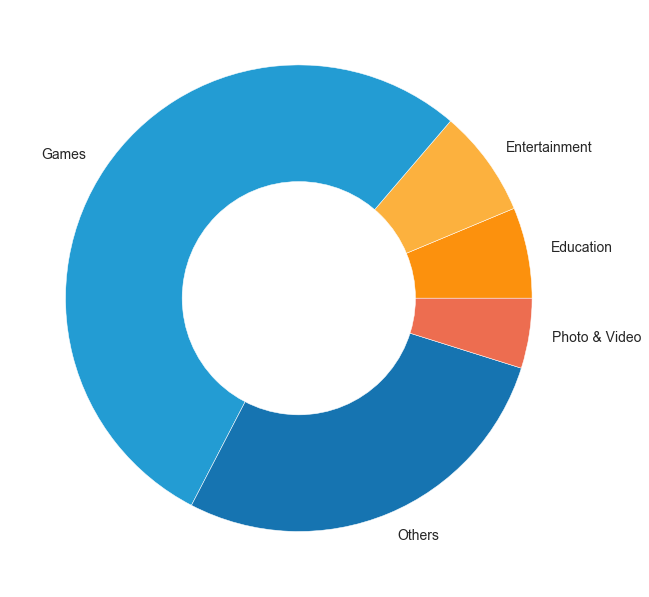

In [106]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=AppleStore.broad_genre.value_counts().sort_index().index
size = AppleStore.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

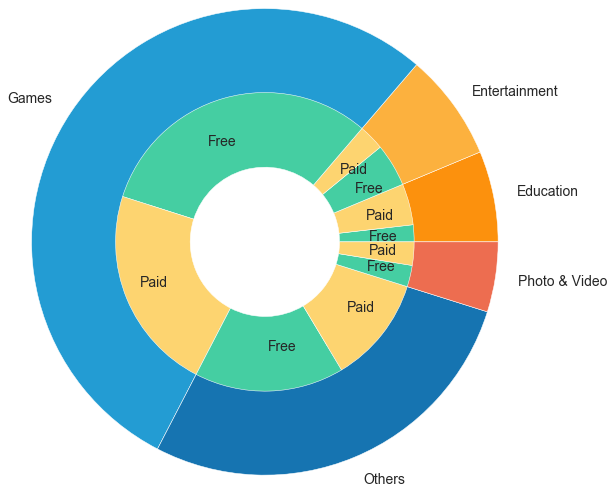

In [108]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=AppleStore.broad_genre.value_counts().sort_index().index
group_size=AppleStore.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()
